In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# **Data Gathering & Formatting**

In [3]:
# Import data
claim = pd.read_csv("Copy of BI - Analyst Test Dataset - Claim.csv")
provider = pd.read_csv("Copy of BI - Analyst Test Dataset - Provider.csv")
member = pd.read_csv ("Copy of BI - Analyst Test Dataset - Member.csv")

claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted
0,17159,Cashless,OUTPATIENT,2025-02-18,NaN,J06.9,"Acute Upper Respiratory Infection, Unspecified",P700435,Member6663185,"440,217.63","352,173.87"
1,19038,Cashless,OUTPATIENT,2025-01-15,NaN,I10,Essential (Primary) Hypertension,P638880,Member7017371,"1,085,032.91","1,085,032.91"
2,189166,Cashless,OUTPATIENT,2025-01-10,NaN,J02,Acute Pharyngitis,P573393,Member5867064,"813,103.04","552,544.43"
3,206662,Cashless,OUTPATIENT,2025-01-21,NaN,Z24,Need For Immunization Against Certain Single V...,P510633,Member2570020,"2,341,044.80","1,825,083.74"
4,227529,Cashless,OUTPATIENT,2024-12-29,NaN,J00,Acute Nasopharyngitis (Common Cold),P700435,Member913959,"328,084.63","262,467.70"


In [4]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20616 entries, 0 to 20615
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ClaimNo           20616 non-null  int64 
 1   ClaimMethod       20616 non-null  object
 2   BenefitGroupIPOP  20616 non-null  object
 3   AdmissionDate     20616 non-null  object
 4   DischargeDate     792 non-null    object
 5   ICDCode           20616 non-null  object
 6   Diagnose          20616 non-null  object
 7   ProviderID        20615 non-null  object
 8   MemberNo          20616 non-null  object
 9   Billed            20616 non-null  object
 10  Accepted          20616 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [5]:
# Change necessary data type
claim['AdmissionDate'] = pd.to_datetime(claim['AdmissionDate'], errors='coerce')
claim['DischargeDate'] = pd.to_datetime(claim['DischargeDate'], errors='coerce')

# Remove commas and convert to float
claim['Billed'] = claim['Billed'].str.replace(',', '').astype(float)
claim['Accepted'] = claim['Accepted'].str.replace(',', '').astype(float)


In [6]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64554 entries, 0 to 64553
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MemberNo      64554 non-null  object
 1   MemberName    64554 non-null  object
 2   Membership    64554 non-null  object
 3   MemberSex     64554 non-null  object
 4   MemberAgeBin  64554 non-null  object
 5   CompanyID     64554 non-null  object
 6   Company       64554 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB


In [7]:
provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProviderID    6057 non-null   object
 1   ProviderName  6057 non-null   object
 2   ProviderType  6057 non-null   object
 3   Province      5848 non-null   object
 4   City          5838 non-null   object
dtypes: object(5)
memory usage: 236.7+ KB


In [8]:
claim['BenefitGroupIPOP'].value_counts()

BenefitGroupIPOP
OUTPATIENT    19824
INPATIENT       792
Name: count, dtype: int64

In [9]:
claim[['ICDCode', 'Diagnose']].value_counts().head(10)

ICDCode  Diagnose                                                                       
J06      Acute Upper Respiratory Infections Of Multiple And Unspecified Sites/Urti/ Ispa    2934
J00      Acute Nasopharyngitis (Common Cold)                                                2318
J06.9    Acute Upper Respiratory Infection, Unspecified                                     2054
J02      Acute Pharyngitis                                                                  1811
Z34      Supervision Of Normal Pregnancy                                                    1491
R50.9    Fever,Unspecified (Demam, Tidak Specifik)                                          1107
K30      Dyspepsia                                                                          1099
A09      Diarrhoea And Gastroenteritis Of Presumed Infectious Origin(Ged)                   1043
K02      Dental Caries                                                                       887
H52.1    Myopia (Rabun Jauh)          

<Axes: xlabel='Billed', ylabel='Count'>

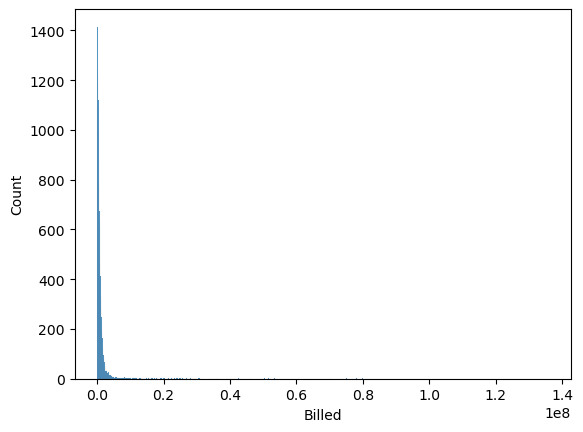

In [10]:
sns.histplot(data=claim, x="Billed")

In [11]:
claim['ICDCode'].unique()

array(['J06.9', 'I10', 'J02', 'Z24', 'J00', 'R50.9', 'K30', 'J06', 'O82',
       'Z34', 'Z23', 'K02', 'K01.1', 'H10', 'J18.0', 'H52.1', 'A90',
       'M54.5', 'K04.1', 'K04.0', 'A09', 'J02.9', 'A91', 'A01.0'],
      dtype=object)

## **EDA**

### **Outlier**

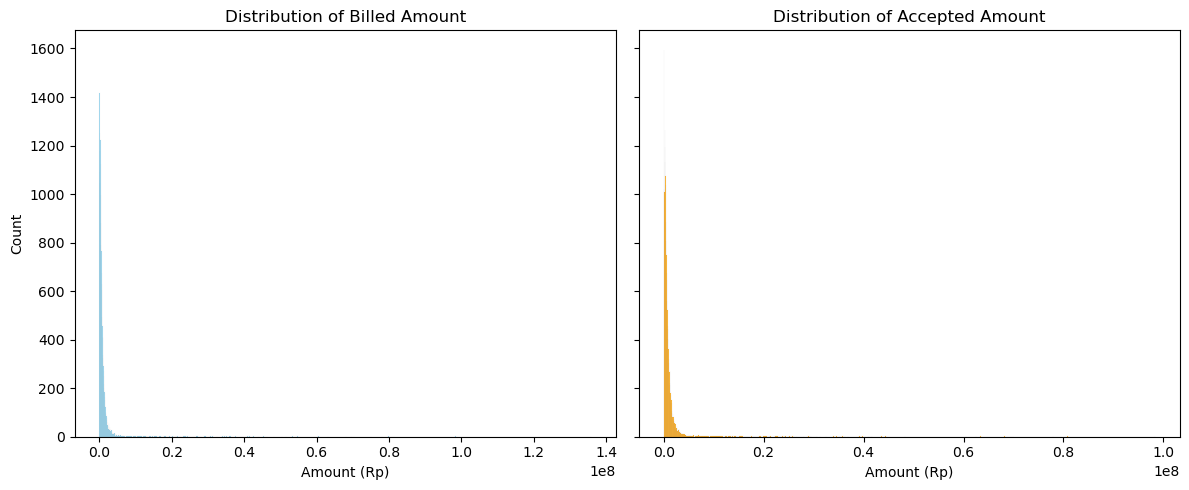

In [12]:
# Create side-by-side histograms using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for 'Billed'
sns.histplot(claim['Billed'],  color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Billed Amount')
axes[0].set_xlabel('Amount (Rp)')

# Histogram for 'Accepted'
sns.histplot(claim['Accepted'], color='orange', ax=axes[1])
axes[1].set_title('Distribution of Accepted Amount')
axes[1].set_xlabel('Amount (Rp)')

plt.tight_layout()
plt.show()

In [13]:
claim.describe()

,ClaimNo,AdmissionDate,DischargeDate,Billed,Accepted
count,2.061600e+04,20616,792,2.061600e+04,2.061600e+04
mean,5.006353e+08,2025-02-04 20:41:21.024446976,2025-02-08 12:18:10.909090816,1.131823e+06,1.018624e+06
min,1.715900e+04,2024-12-01 00:00:00,2024-12-02 00:00:00,1.027897e+04,0.000000e+00
25%,2.484778e+08,2025-01-04 00:00:00,2025-01-10 00:00:00,2.505828e+05,2.260663e+05
50%,5.046697e+08,2025-02-06 00:00:00,2025-02-09 00:00:00,5.159585e+05,4.834191e+05
75%,7.536681e+08,2025-03-08 00:00:00,2025-03-09 00:00:00,1.009948e+06,9.529487e+05
max,9.999696e+08,2025-04-13 00:00:00,2025-04-18 00:00:00,1.358417e+08,9.839889e+07
std,2.900124e+08,NaN,NaN,3.433947e+06,2.950127e+06


In [14]:
claim['Accepted'].sum()

20999962407.16

In [15]:
# Find the most highest value (Billed)
claim[claim['Billed'] == 135841657.38]


,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted
10850,530504114,Cashless,INPATIENT,2025-03-02,2025-03-09,O82,Single Delivery By Caesarean Section (Melahirk...,P176519,Member3424845,1.358417e+08,44412800.0


In [16]:
# Find the most highest value (Accepted)
claim[claim['Accepted'] == 98398888.83]


,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted
11570,564341828,Cashless,INPATIENT,2024-12-29,2025-01-02,R50.9,"Fever,Unspecified (Demam, Tidak Specifik)",P391991,Member9749869,98398888.83,98398888.83


### **Diagnoses Analysis**

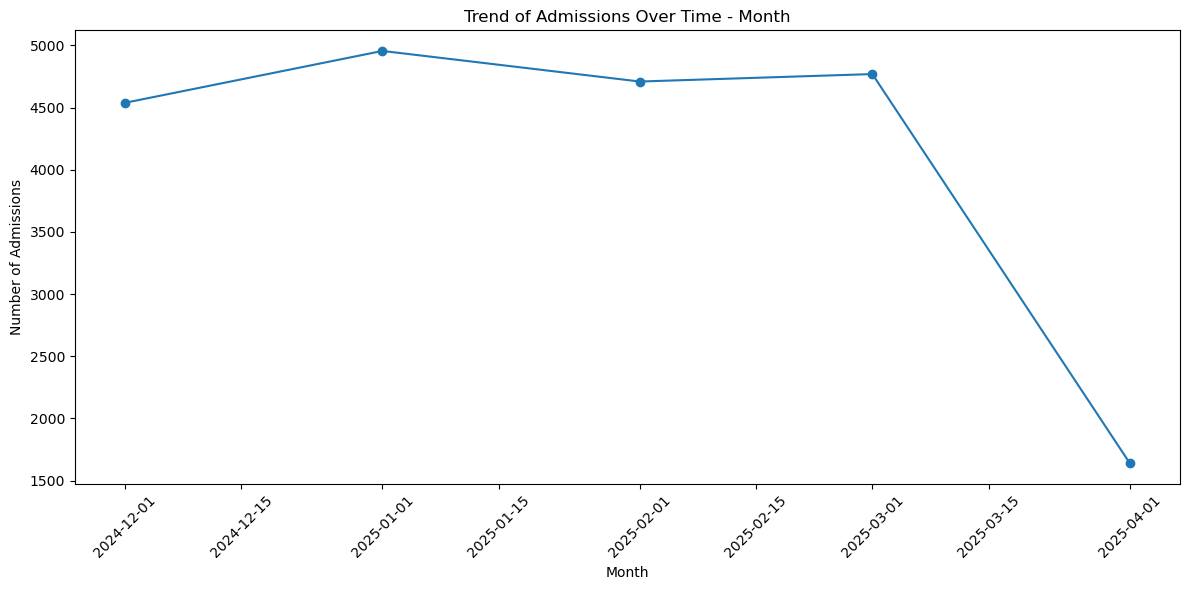

In [17]:
# Extract year-month period
claim['YearMonth'] = claim['AdmissionDate'].dt.to_period('M').dt.to_timestamp()

# Group by YearMonth and count admissions
monthly_counts = claim.groupby('YearMonth').size().reset_index(name='count')

# Plot trend line by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['YearMonth'], monthly_counts['count'], marker='o')
plt.title('Trend of Admissions Over Time - Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Group by YearMonth, ICDCode, and Diagnose, then count the number of claims
top_claims = (
    claim.groupby(['YearMonth', 'ICDCode', 'Diagnose'])
    .size()
    .reset_index(name='total_claims')
)

# Sort by total_claims descending
top_claims_sorted = top_claims.sort_values(['YearMonth', 'total_claims'], ascending=[True, False])

# Get top 10 for each YearMonth
top_10_by_month = (
    top_claims_sorted
    .groupby('YearMonth')
    .head(10)
    .reset_index(drop=True)
)

top_10_by_month


,YearMonth,ICDCode,Diagnose,total_claims
0,2024-12-01,J06,Acute Upper Respiratory Infections Of Multiple...,717
1,2024-12-01,J00,Acute Nasopharyngitis (Common Cold),521
2,2024-12-01,J06.9,"Acute Upper Respiratory Infection, Unspecified",471
3,2024-12-01,J02,Acute Pharyngitis,419
4,2024-12-01,Z34,Supervision Of Normal Pregnancy,285
5,2024-12-01,K30,Dyspepsia,257
6,2024-12-01,R50.9,"Fever,Unspecified (Demam, Tidak Specifik)",257
7,2024-12-01,K02,Dental Caries,230
8,2024-12-01,A09,Diarrhoea And Gastroenteritis Of Presumed Infe...,196
9,2024-12-01,H52.1,Myopia (Rabun Jauh),171


In [19]:
claim[claim["ICDCode"] == "J02.9"]

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth
73,3569375,Cashless,OUTPATIENT,2025-03-05,NaT,J02.9,"Acute Pharyngitis, Unspecified",P700435,Member2880512,34858.71,31372.84,2025-03-01
75,3608306,Cashless,OUTPATIENT,2025-01-21,NaT,J02.9,"Acute Pharyngitis, Unspecified",P638880,Member2867622,784870.43,784870.43,2025-01-01
131,5922140,Cashless,OUTPATIENT,2025-02-11,NaT,J02.9,"Acute Pharyngitis, Unspecified",P700435,Member9604622,237362.23,237362.23,2025-02-01
196,9240234,Cashless,OUTPATIENT,2025-02-20,NaT,J02.9,"Acute Pharyngitis, Unspecified",P638880,Member5118455,118741.48,118741.48,2025-02-01
225,10517713,Cashless,OUTPATIENT,2024-12-08,NaT,J02.9,"Acute Pharyngitis, Unspecified",P849947,Member8389503,611715.24,611715.24,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
20511,994556624,Cashless,OUTPATIENT,2025-02-12,NaT,J02.9,"Acute Pharyngitis, Unspecified",P700435,Member1856342,119764.56,95811.65,2025-02-01
20535,995664918,Cashless,OUTPATIENT,2025-02-28,NaT,J02.9,"Acute Pharyngitis, Unspecified",P125728,Member8114747,643545.93,643545.93,2025-02-01
20585,997929532,Cashless,OUTPATIENT,2025-01-18,NaT,J02.9,"Acute Pharyngitis, Unspecified",P700435,Member2506250,24189.39,21770.45,2025-01-01
20586,998009182,Cashless,OUTPATIENT,2025-03-15,NaT,J02.9,"Acute Pharyngitis, Unspecified",P688019,Member2235349,40803.38,40803.38,2025-03-01


In [20]:
top_10_by_month['total_claims'].median()

251.0

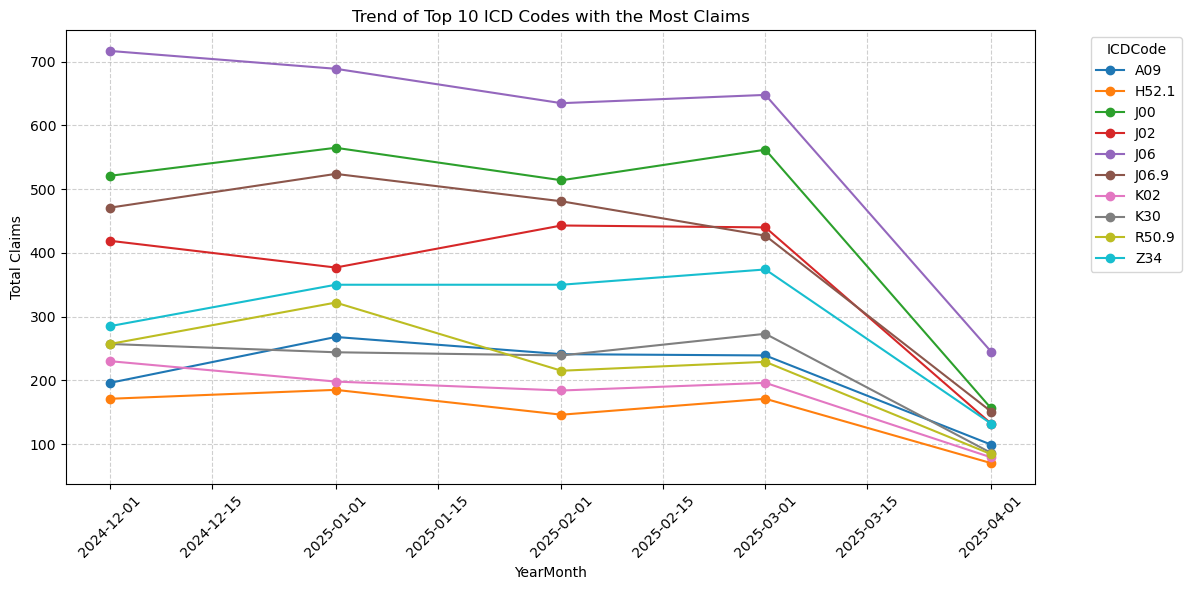

In [21]:
# Group by YearMonth and ICDCode, count total claims
top_claims = (
    claim.groupby(['YearMonth', 'ICDCode'])
    .size()
    .reset_index(name='total_claims')
)

# Filter ICPCodes with total claim count > 250 (across all months)
high_volume_icp = (
    top_claims.groupby('ICDCode')['total_claims']
    .sum()
    .reset_index()
    .query('total_claims > 250')['ICDCode']
)

# Calculate total claims for each ICDCode, sort, and select the top 10
top_10_icp = (
    top_claims.groupby('ICDCode')['total_claims']
    .sum()
    .reset_index()
    .sort_values('total_claims', ascending=False)
    .head(10)['ICDCode']
)

# Filter original grouped data to only include the top 10 ICDCodes
filtered_trend = top_claims[top_claims['ICDCode'].isin(top_10_icp)]

# Pivot for trend plotting
pivot_trend = filtered_trend.pivot(index='YearMonth', columns='ICDCode', values='total_claims')

# Plot the trend lines for the top 10 ICDCodes
plt.figure(figsize=(12, 6))
for col in pivot_trend.columns:
    plt.plot(pivot_trend.index, pivot_trend[col], marker='o', label=col)

# Title, labels, and other plot settings
plt.title('Trend of Top 10 ICD Codes with the Most Claims')
plt.xlabel('YearMonth')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust legend to be side by side
plt.legend(title='ICDCode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### **Seasonality Analysis**
#### **Based on Total Klaim**

In [22]:
claim.groupby('YearMonth').size()

YearMonth
2024-12-01    4539
2025-01-01    4956
2025-02-01    4710
2025-03-01    4770
2025-04-01    1641
dtype: int64

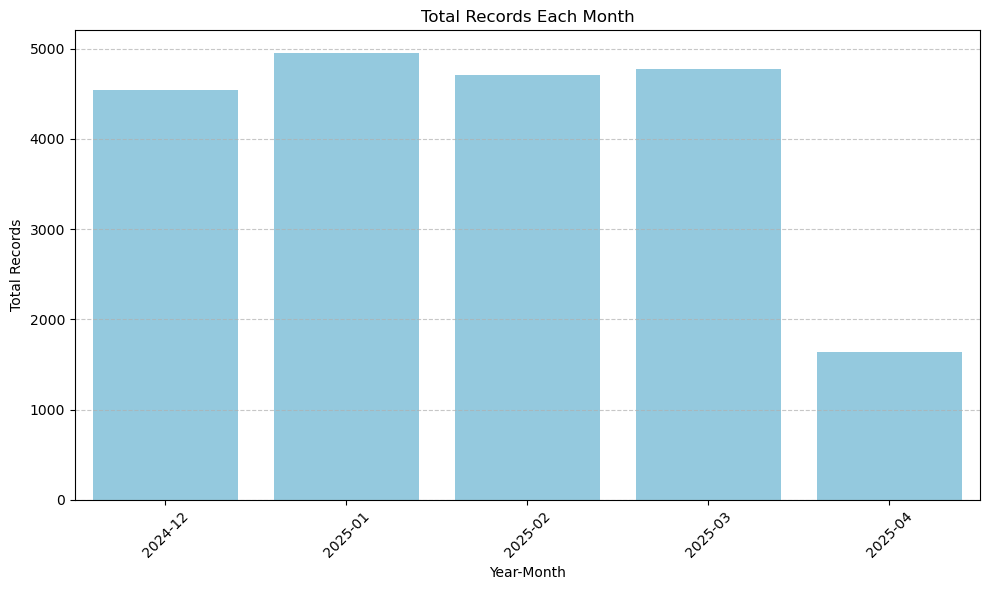

In [23]:
# Convert YearMonth to datetime if it's not already
claim['YearMonth'] = pd.to_datetime(claim['YearMonth'])

# Sort by YearMonth
claim = claim.sort_values('YearMonth')

# Optional: if you want it as a string format but still ordered
claim['YearMonth_str'] = claim['YearMonth'].dt.strftime('%Y-%m')

# Set the order for the x-axis
order = claim['YearMonth_str'].sort_values().unique()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=claim, x='YearMonth_str', order=order, color='skyblue')

# Customize the plot
plt.title('Total Records Each Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Records')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# Group by YearMonth and count records
monthly_counts = claim.groupby('YearMonth_str').size().reset_index(name='Total_Records')

# Calculate Month-over-Month (MoM) growth
monthly_counts['MoM_Growth'] = monthly_counts['Total_Records'].diff()
monthly_counts['MoM_Growth_Percent'] = monthly_counts['Total_Records'].pct_change() * 100

# Round percentage to 2 decimal places
monthly_counts['MoM_Growth_Percent'] = monthly_counts['MoM_Growth_Percent'].round(2)

# Display the result
print(monthly_counts)


  YearMonth_str  Total_Records  MoM_Growth  MoM_Growth_Percent
0       2024-12           4539         NaN                 NaN
1       2025-01           4956       417.0                9.19
2       2025-02           4710      -246.0               -4.96
3       2025-03           4770        60.0                1.27
4       2025-04           1641     -3129.0              -65.60


In [25]:
claim.shape

(20616, 13)

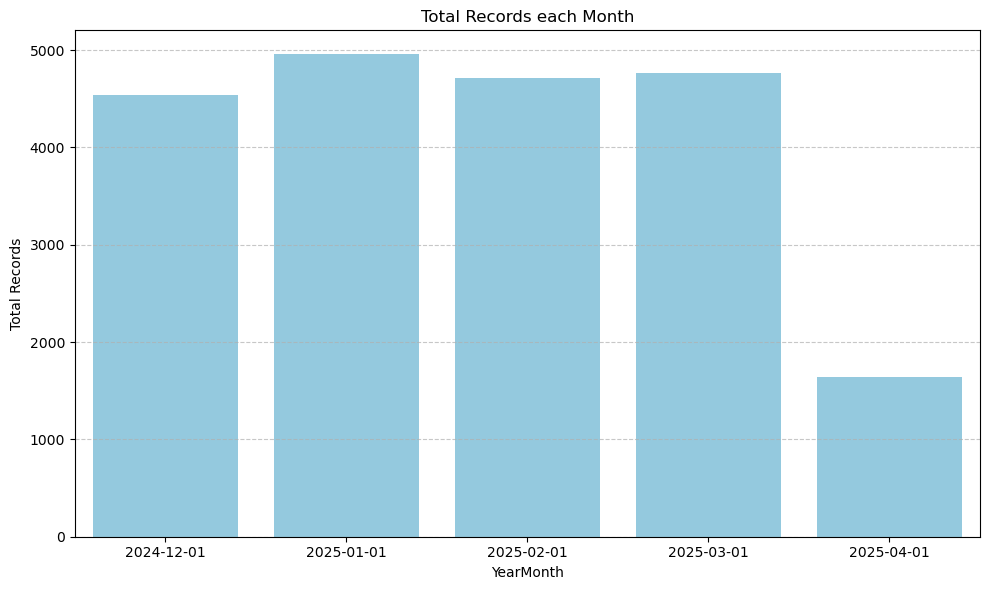

In [26]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=claim, x= "YearMonth", color="skyblue")

# Customize the plot
plt.title('Total Records each Month')
plt.xlabel('YearMonth')
plt.ylabel('Total Records')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,369513.83,369513.83,2024-12-01,2024-12
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,232135.49,232135.49,2024-12-01,2024-12
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,1326671.92,1326671.92,2024-12-01,2024-12
3890,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,236211.60,236211.60,2024-12-01,2024-12
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,178464.49,178464.49,2024-12-01,2024-12


#### **Based on Total Billed & Accepted**

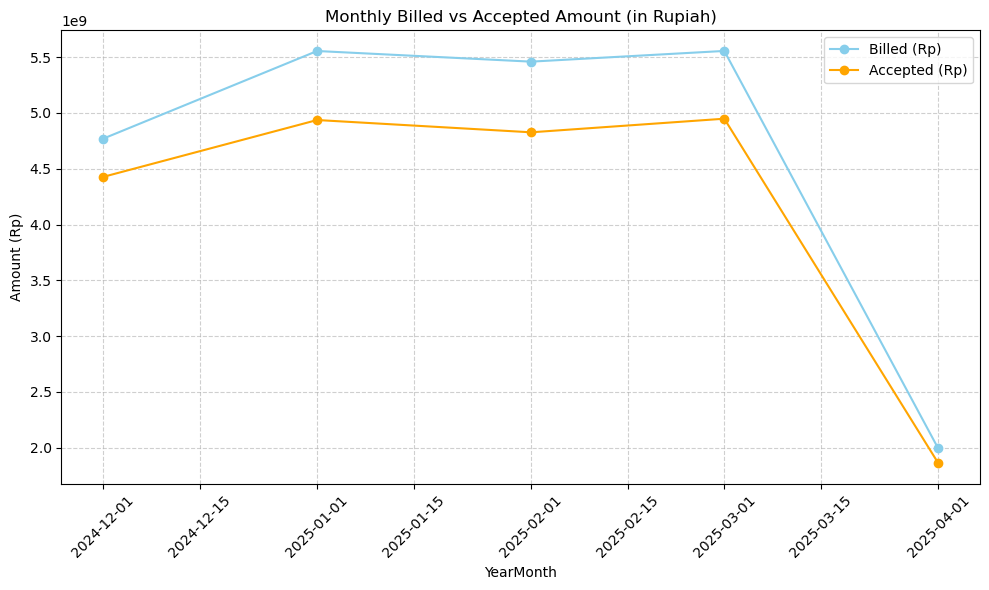

In [28]:
# Group by 'YearMonth' and sum 'Billed' and 'Accepted'
monthly_summary = claim.groupby('YearMonth')[['Billed', 'Accepted']].sum()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary.index, monthly_summary['Billed'], marker='o', label='Billed (Rp)', color='skyblue')
plt.plot(monthly_summary.index, monthly_summary['Accepted'], marker='o', label='Accepted (Rp)', color='orange')

# Customize the plot
plt.title('Monthly Billed vs Accepted Amount (in Rupiah)')
plt.xlabel('YearMonth')
plt.ylabel('Amount (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Group by 'YearMonth' and sum 'Billed' and 'Accepted'
monthly_summary = claim.groupby('YearMonth')[['Billed', 'Accepted']].sum().reset_index()

# Sort by date to ensure correct order
monthly_summary['YearMonth'] = pd.to_datetime(monthly_summary['YearMonth'])
monthly_summary = monthly_summary.sort_values('YearMonth')

# Calculate MoM growth for Billed
monthly_summary['Billed_MoM_Growth'] = monthly_summary['Billed'].diff()
monthly_summary['Billed_MoM_Growth_%'] = monthly_summary['Billed'].pct_change() * 100

# Optional: Calculate MoM growth for Accepted
monthly_summary['Accepted_MoM_Growth'] = monthly_summary['Accepted'].diff()
monthly_summary['Accepted_MoM_Growth_%'] = monthly_summary['Accepted'].pct_change() * 100

# Round the percentage columns
monthly_summary['Billed_MoM_Growth_%'] = monthly_summary['Billed_MoM_Growth_%'].round(2)
monthly_summary['Accepted_MoM_Growth_%'] = monthly_summary['Accepted_MoM_Growth_%'].round(2)

# Optional: Format YearMonth as string if needed
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].dt.strftime('%Y-%m')

# Display the final DataFrame
monthly_summary


,YearMonth,Billed,Accepted,Billed_MoM_Growth,Billed_MoM_Growth_%,Accepted_MoM_Growth,Accepted_MoM_Growth_%
0,2024-12,4.769629e+09,4.426988e+09,NaN,NaN,NaN,NaN
1,2025-01,5.555602e+09,4.936808e+09,7.859724e+08,16.48,5.098203e+08,11.52
2,2025-02,5.460224e+09,4.826671e+09,-9.537802e+07,-1.72,-1.101376e+08,-2.23
3,2025-03,5.556157e+09,4.948614e+09,9.593359e+07,1.76,1.219429e+08,2.53
4,2025-04,1.992046e+09,1.860882e+09,-3.564112e+09,-64.15,-3.087731e+09,-62.40


#### **Based on Average Billed & Accepted**

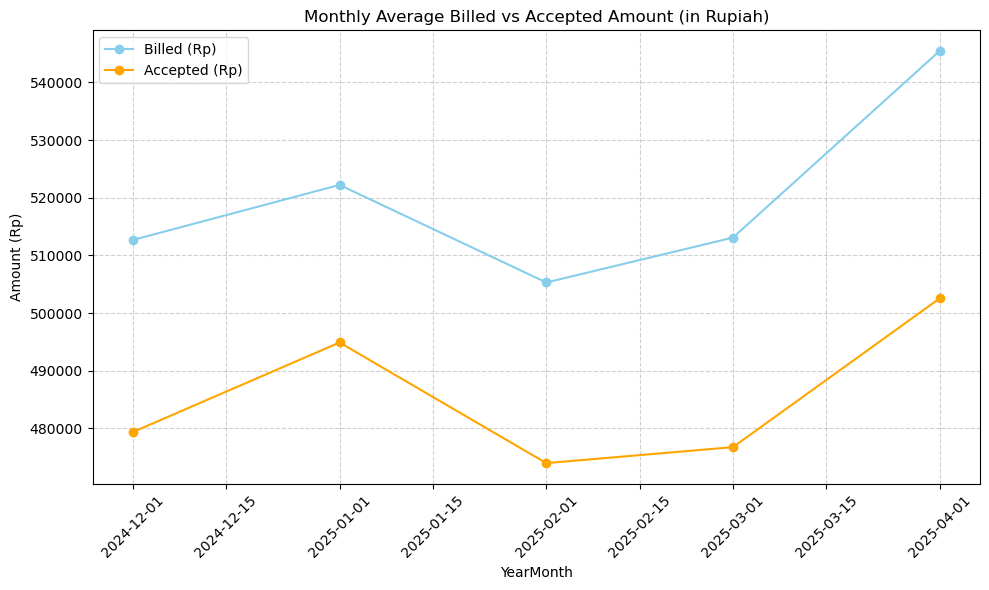

In [30]:
# Group by 'YearMonth' and sum 'Billed' and 'Accepted'
monthly_summary_average = claim.groupby('YearMonth')[['Billed', 'Accepted']].median()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary_average.index, monthly_summary_average['Billed'], marker='o', label='Billed (Rp)', color='skyblue')
plt.plot(monthly_summary_average.index, monthly_summary_average['Accepted'], marker='o', label='Accepted (Rp)', color='orange')

# Customize the plot
plt.title('Monthly Average Billed vs Accepted Amount (in Rupiah)')
plt.xlabel('YearMonth')
plt.ylabel('Amount (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Group by 'YearMonth' and calculate the median of 'Billed' and 'Accepted'
monthly_median = claim.groupby('YearMonth')[['Billed', 'Accepted']].median().reset_index()

# Convert 'YearMonth' to datetime and sort
monthly_median['YearMonth'] = pd.to_datetime(monthly_median['YearMonth'])
monthly_median = monthly_median.sort_values('YearMonth')

# Calculate MoM growth for Billed and Accepted
monthly_median['Billed_MoM_Growth'] = monthly_median['Billed'].diff()
monthly_median['Billed_MoM_Growth_%'] = monthly_median['Billed'].pct_change() * 100

monthly_median['Accepted_MoM_Growth'] = monthly_median['Accepted'].diff()
monthly_median['Accepted_MoM_Growth_%'] = monthly_median['Accepted'].pct_change() * 100

# Round the percentage columns
monthly_median['Billed_MoM_Growth_%'] = monthly_median['Billed_MoM_Growth_%'].round(2)
monthly_median['Accepted_MoM_Growth_%'] = monthly_median['Accepted_MoM_Growth_%'].round(2)

# Format YearMonth to string for display if needed
monthly_median['YearMonth'] = monthly_median['YearMonth'].dt.strftime('%Y-%m')

# Display the table
monthly_median

,YearMonth,Billed,Accepted,Billed_MoM_Growth,Billed_MoM_Growth_%,Accepted_MoM_Growth,Accepted_MoM_Growth_%
0,2024-12,512681.400,479360.420,NaN,NaN,NaN,NaN
1,2025-01,522227.890,494898.330,9546.490,1.86,15537.910,3.24
2,2025-02,505305.245,473975.520,-16922.645,-3.24,-20922.810,-4.23
3,2025-03,513089.570,476746.255,7784.325,1.54,2770.735,0.58
4,2025-04,545466.840,502545.600,32377.270,6.31,25799.345,5.41


In [32]:
# Calculate MoM % growth
monthly_growth = monthly_summary_average.pct_change() * 100  # multiply by 100 to get percentages

# Optional: Round for readability
monthly_growth = monthly_growth.round(2)

# View growth DataFrame
print(monthly_growth)


            Billed  Accepted
YearMonth                   
2024-12-01     NaN       NaN
2025-01-01    1.86      3.24
2025-02-01   -3.24     -4.23
2025-03-01    1.54      0.58
2025-04-01    6.31      5.41


In [33]:
# Set pandas to display numbers in a more readable format (no scientific notation)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Group by 'ICDCode' and calculate the median of 'Billed' for each ICDCode
claim.groupby('ICDCode')['Billed'].median().reset_index().sort_values(by='Billed', ascending=False)


,ICDCode,Billed
19,O82,"27,724,751.08"
3,A91,"6,131,459.07"
2,A90,"4,707,461.78"
21,Z23,"1,415,289.88"
22,Z24,"1,339,428.00"
12,J18.0,"1,326,729.00"
0,A01.0,"1,319,653.93"
5,H52.1,"1,266,026.56"
15,K04.0,"911,093.40"
16,K04.1,"893,364.86"


In [34]:
claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12
3890,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,"236,211.60","236,211.60",2024-12-01,2024-12
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12


## **Check Statistics**
There are 5 ICD Codes that are related to respiratory diseases : J00, J02, J02.9, J06, J06.9. Observe the trend of respiratory diseases! Explain and provide relevant visual!
### **1. Are there noticeable increases/decreases on weekends compared to typical weekdays?**



In [35]:
claim_respiratory= claim[claim["ICDCode"].isin(['J02', 'J06.9', 'J06', 'J00', 'J02.9'])]
claim_respiratory

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12
3886,187092172,Cashless,OUTPATIENT,2024-12-13,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P700435,Member2736202,"360,061.92","288,049.54",2024-12-01,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,326705092,Cashless,OUTPATIENT,2025-04-05,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P688745,Member9987089,"640,955.66","617,891.26",2025-04-01,2025-04
9208,449355094,Cashless,OUTPATIENT,2025-04-07,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P391991,Member1678499,"926,047.17","926,047.17",2025-04-01,2025-04
13377,652399464,Cashless,OUTPATIENT,2025-04-13,NaT,J00,Acute Nasopharyngitis (Common Cold),P107067,Member9313097,"1,172,613.43","1,172,613.43",2025-04-01,2025-04
15312,746555571,Cashless,OUTPATIENT,2025-04-11,NaT,J02.9,"Acute Pharyngitis, Unspecified",P363829,Member375481,"628,716.52","628,716.52",2025-04-01,2025-04


In [36]:
claim_respiratory['day_of_week'] = claim_respiratory['AdmissionDate'].dt.day_name()

C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\3213862143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claim_respiratory['day_of_week'] = claim_respiratory['AdmissionDate'].dt.day_name()


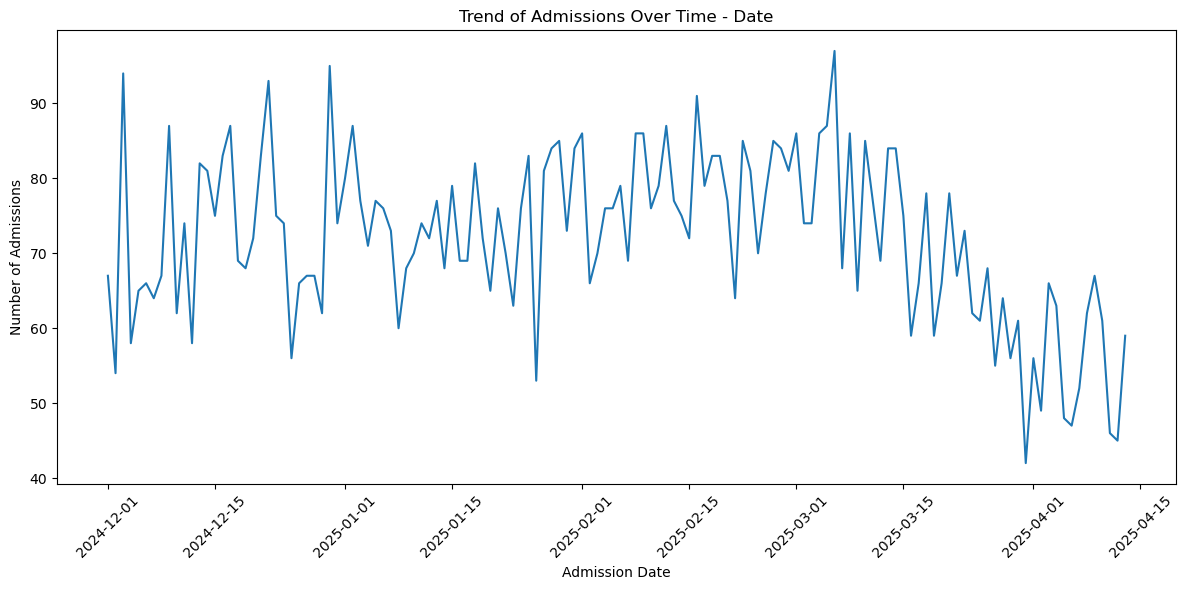

In [37]:
# Group by date and count number of admissions per day
daily_counts_date = claim_respiratory.groupby('AdmissionDate').size().reset_index(name='count')

# Plot trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts_date, x='AdmissionDate', y='count')
plt.title('Trend of Admissions Over Time - Date')
plt.xlabel('Admission Date')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\3162485361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claim_respiratory['day_of_week'] = pd.Categorical(
C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\3162485361.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = claim_respiratory.groupby('day_of_week').size().reset_index(name='count')


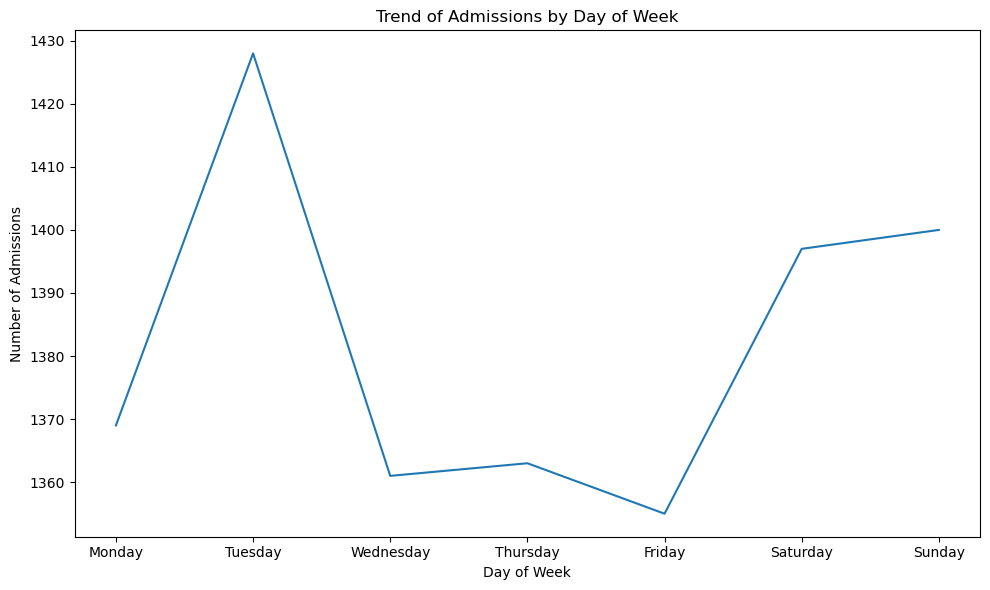

In [38]:
# Define the correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure 'day_of_week' column is a categorical type with proper order
claim_respiratory['day_of_week'] = pd.Categorical(
    claim_respiratory['day_of_week'], 
    categories=day_order, 
    ordered=True
)

# Group and count
daily_counts = claim_respiratory.groupby('day_of_week').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_counts, x='day_of_week', y='count')
plt.title('Trend of Admissions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Admissions')
plt.tight_layout()
plt.show()

In [39]:
claim['Accepted_rate'] = (claim["Accepted"]/claim["Billed"]) *100
claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12,100.00
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12,100.00
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12,100.00
3890,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,"236,211.60","236,211.60",2024-12-01,2024-12,100.00
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12,100.00


In [40]:
# 3. Group and compute median
monthly_median = (
    claim
    .groupby('YearMonth')['Accepted_rate']
    .mean()
    .reset_index(name='median_accepted_rate')
)

print(monthly_median)

   YearMonth  median_accepted_rate
0 2024-12-01                 94.38
1 2025-01-01                 94.23
2 2025-02-01                 94.37
3 2025-03-01                 94.06
4 2025-04-01                 95.02


### **2. Are there noticeable increases/decreases around Christmas break, Ramadhan, and Eid Al - Fitri?**

In [41]:
from scipy.stats import mannwhitneyu

In [42]:
# Define Christmas date
christmas = pd.to_datetime('2024-12-25')

# Filter 7 days before and after Christmas
data_before_christmas = claim_respiratory[(claim_respiratory['AdmissionDate'] >= (christmas - pd.Timedelta(days=7))) & 
                              (claim_respiratory['AdmissionDate'] < christmas)]

data_after_christmas = claim_respiratory[(claim_respiratory['AdmissionDate'] > christmas) & 
                             (claim_respiratory['AdmissionDate'] <= (christmas + pd.Timedelta(days=7)))]

# Count number of claims per day
before_counts = data_before_christmas.groupby('AdmissionDate').size()
after_counts = data_after_christmas.groupby('AdmissionDate').size()

# Mann-Whitney U test
stat, p = mannwhitneyu(before_counts, after_counts, alternative='two-sided')

print("Mann-Whitney U test result:")
print("Statistic =", stat, ", p-value =", p)

Mann-Whitney U test result:
Statistic = 33.5 , p-value = 0.2763810240508192


In [43]:
# Define date ranges
ramadhan_start = pd.to_datetime('2025-02-28')
ramadhan_end = pd.to_datetime('2025-03-29')
eid_start = pd.to_datetime('2025-03-30')
eid_end = pd.to_datetime('2025-03-31')

# Create subsets
claims_ramadhan = claim_respiratory[(claim_respiratory['AdmissionDate'] >= ramadhan_start) & (claim_respiratory['AdmissionDate'] <= ramadhan_end)]
claims_eid = claim_respiratory[(claim_respiratory['AdmissionDate'] >= eid_start) & (claim_respiratory['AdmissionDate'] <= eid_end)]

# Count daily claims
daily_ramadhan = claims_ramadhan.groupby('AdmissionDate').size()
daily_eid = claims_eid.groupby('AdmissionDate').size()

# Optional: compare Ramadhan with before Ramadhan
before_ramadhan = claim_respiratory[(claim_respiratory['AdmissionDate'] >= pd.to_datetime('2025-02-01')) & 
                        (claim_respiratory['AdmissionDate'] < ramadhan_start)]
daily_before = before_ramadhan.groupby('AdmissionDate').size()

# Mann-Whitney U Test
stat, p = mannwhitneyu(daily_before, daily_ramadhan, alternative='two-sided')
print(f"Ramadhan Test: U={stat}, p-value={p}")

stat_eid, p_eid = mannwhitneyu(daily_ramadhan, daily_eid, alternative='two-sided')
print(f"Eid Test: U={stat_eid}, p-value={p_eid}")

Ramadhan Test: U=537.0, p-value=0.0353664144107457
Eid Test: U=55.5, p-value=0.05138956866101685


#### **Based on total claim**

C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\687752009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claim_respiratory['YearMonth'] = pd.to_datetime(claim_respiratory['YearMonth'])


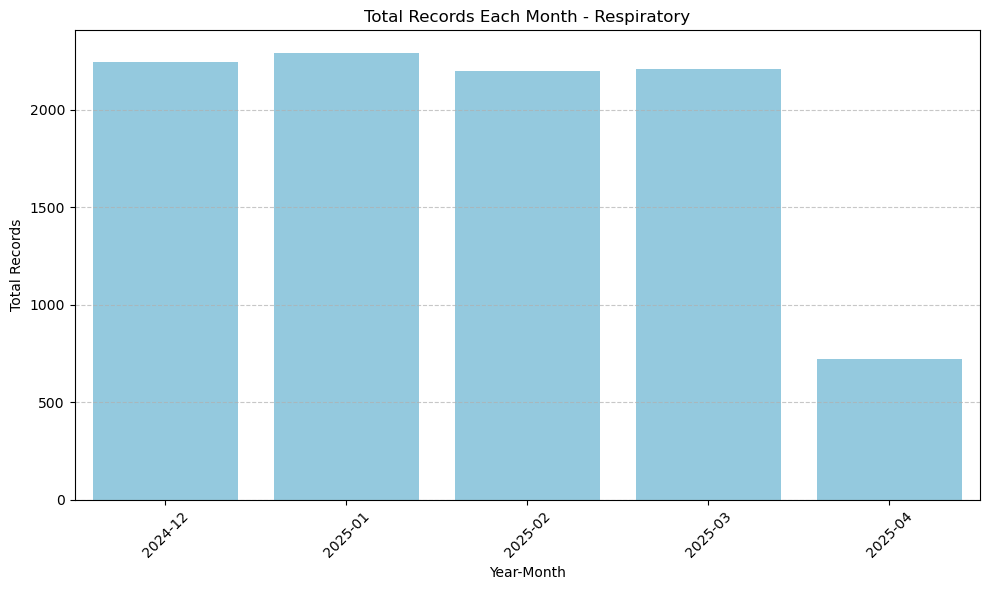

In [44]:
# Convert YearMonth to datetime if it's not already
claim_respiratory['YearMonth'] = pd.to_datetime(claim_respiratory['YearMonth'])

# Sort by YearMonth
claim_respiratory = claim_respiratory.sort_values('YearMonth')

# Optional: if you want it as a string format but still ordered
claim_respiratory['YearMonth_str'] = claim_respiratory['YearMonth'].dt.strftime('%Y-%m')

# Set the order for the x-axis
order = claim_respiratory['YearMonth_str'].sort_values().unique()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=claim_respiratory, x='YearMonth_str', order=order, color='skyblue')

# Customize the plot
plt.title('Total Records Each Month - Respiratory')
plt.xlabel('Year-Month')
plt.ylabel('Total Records')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
claim_respiratory.groupby("YearMonth")["ClaimNo"].count()

YearMonth
2024-12-01    2245
2025-01-01    2294
2025-02-01    2201
2025-03-01    2212
2025-04-01     721
Name: ClaimNo, dtype: int64

In [46]:
# Create a pivot table: rows = YearMonth, columns = Diagnose, values = count
pivot_table = claim_respiratory.pivot_table(
    index='YearMonth',
    columns='Diagnose',
    values='ClaimNo',  # or any column that identifies unique claims
    aggfunc='count',
    fill_value=0
)

# View the result
pivot_table

Diagnose,Acute Nasopharyngitis (Common Cold),Acute Pharyngitis,"Acute Pharyngitis, Unspecified","Acute Upper Respiratory Infection, Unspecified",Acute Upper Respiratory Infections Of Multiple And Unspecified Sites/Urti/ Ispa
YearMonth,,,,,
2024-12-01,521,419,117,471,717
2025-01-01,565,377,139,524,689
2025-02-01,514,443,128,481,635
2025-03-01,562,440,135,427,648
2025-04-01,156,132,37,151,245


#### **Based on Total Billed and Accepted**

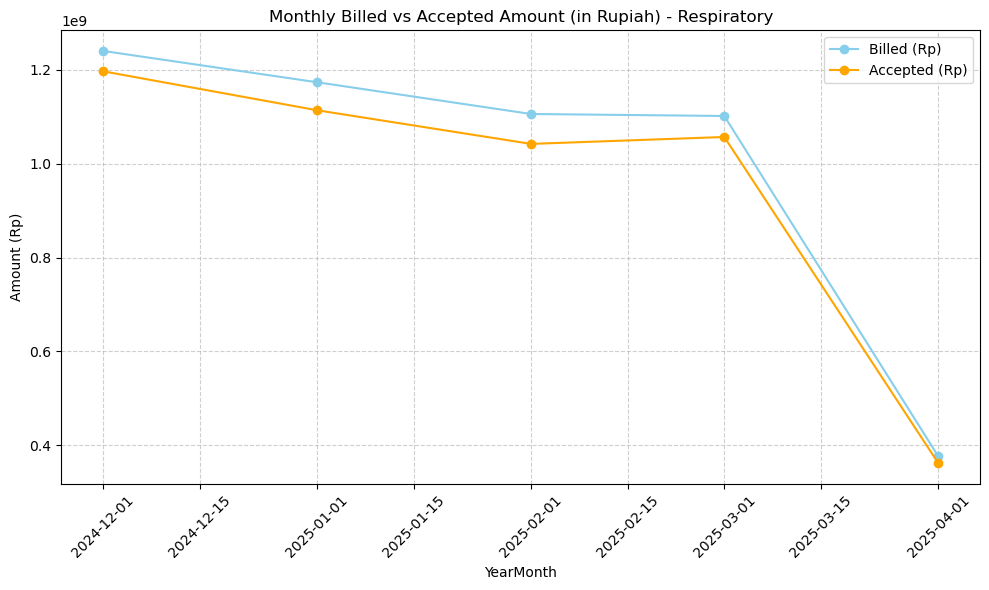

In [47]:
# Group by 'YearMonth' and sum 'Billed' and 'Accepted'
monthly_summary = claim_respiratory.groupby('YearMonth')[['Billed', 'Accepted']].sum()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary.index, monthly_summary['Billed'], marker='o', label='Billed (Rp)', color='skyblue')
plt.plot(monthly_summary.index, monthly_summary['Accepted'], marker='o', label='Accepted (Rp)', color='orange')

# Customize the plot
plt.title('Monthly Billed vs Accepted Amount (in Rupiah) - Respiratory')
plt.xlabel('YearMonth')
plt.ylabel('Amount (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
claim_respiratory.groupby("YearMonth")["Billed"].sum()

YearMonth
2024-12-01   1,239,695,170.11
2025-01-01   1,173,049,513.84
2025-02-01   1,105,511,866.54
2025-03-01   1,101,256,047.03
2025-04-01     376,883,943.99
Name: Billed, dtype: float64

#### **Based on Average**

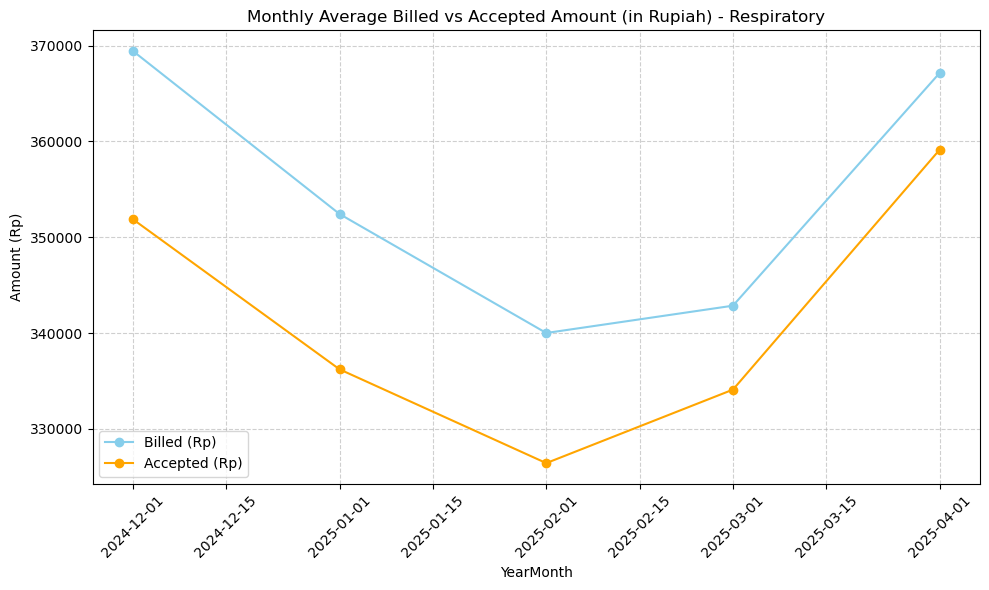

In [49]:
# Group by 'YearMonth' and sum 'Billed' and 'Accepted'
monthly_summary_average = claim_respiratory.groupby('YearMonth')[['Billed', 'Accepted']].median()

# Plot the trend lines
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary_average.index, monthly_summary_average['Billed'], marker='o', label='Billed (Rp)', color='skyblue')
plt.plot(monthly_summary_average.index, monthly_summary_average['Accepted'], marker='o', label='Accepted (Rp)', color='orange')

# Customize the plot
plt.title('Monthly Average Billed vs Accepted Amount (in Rupiah) - Respiratory')
plt.xlabel('YearMonth')
plt.ylabel('Amount (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
claim_respiratory.groupby("YearMonth")["Billed"].median()

YearMonth
2024-12-01   369,438.60
2025-01-01   352,421.49
2025-02-01   340,006.68
2025-03-01   342,855.99
2025-04-01   367,142.34
Name: Billed, dtype: float64

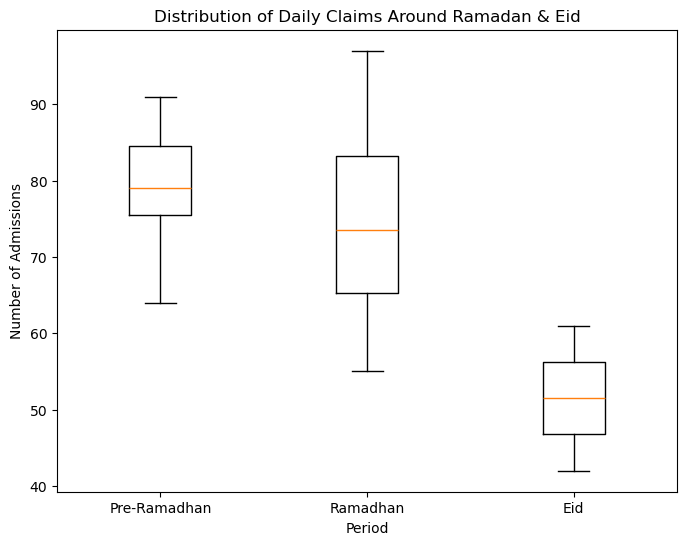

In [51]:
import matplotlib.pyplot as plt

# assuming you already have:
# daily_before, daily_ramadhan, daily_eid
# all are pandas Series indexed by date

data = [
    daily_before.values,
    daily_ramadhan.values,
    daily_eid.values
]
labels = ['Pre-Ramadhan', 'Ramadhan', 'Eid']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, showfliers=True)
plt.title('Distribution of Daily Claims Around Ramadan & Eid')
plt.ylabel('Number of Admissions')
plt.xlabel('Period')
plt.show()


## **PROVIDER**

In [52]:
provider["Province"].nunique()

37

### **Provider Type**

In [53]:
provider_counts = provider['ProviderType'].value_counts().reset_index()
provider_counts.columns = ['ProviderType', 'Count']
provider_counts['Percentage'] = (provider_counts['Count'] / provider_counts['Count'].sum()) * 100

provider_counts


,ProviderType,Count,Percentage
0,Clinic,1979,32.67
1,Pharmacy,1309,21.61
2,Hospital,1282,21.17
3,Optic,1271,20.98
4,Laboratory,216,3.57


### **Number of Provider**

In [107]:
provider["ProviderID"].nunique()

6057

In [54]:
provider['Province'].value_counts()

Province
Jawa Barat                  1336
D.K.I. Jakarta               889
Jawa Timur                   616
Banten                       519
Jawa Tengah                  352
Bali                         218
Kalimantan Timur             193
Sumatera Utara               172
Sulawesi Selatan             158
Sumatera Selatan             152
Kepulauan Riau               140
Sulawesi Utara               116
D.I. Yogyakarta              113
Riau                          96
Kalimantan Selatan            85
Nusa Tenggara Barat           69
Nanggroe Aceh Darussalam      66
Kalimantan Barat              58
Sumatera Barat                51
Nusa Tenggara Timur           48
Lampung                       46
Kalimantan Tengah             42
Jambi                         38
Maluku Utara                  36
Sulawesi Tenggara             34
Papua                         33
Bangka Belitung               33
Sulawesi Tengah               32
Gorontalo                     19
Papua Barat Daya              16
M

In [55]:
provider['City'].value_counts()

City
Kota Jakarta Selatan    322
Kota Surabaya           219
Kota Bekasi             212
Kab. Bekasi             203
Kota Bandung            167
                       ... 
Kab. Bangka Selatan       1
Kab. Nagan Raya           1
Kab. Alor                 1
Kab. Siak                 1
Kab. Maluku Tenggara      1
Name: count, Length: 335, dtype: int64

## **Member Analysis**
Observe the pattern of claims based on the members demography! Do you find any noticeable differences between older and younger age groups? Are there considerable differences between male and female members? 

In [56]:
member['Company'].nunique()

728

In [57]:
member["CompanyID"].value_counts().reset_index()


,CompanyID,count
0,C2952082,13926
1,C1117289,4612
2,C6794750,3367
3,C9395197,2585
4,C3300127,2450
...,...,...
744,C8975828,1
745,C5022213,1
746,C1768679,1
747,C1426252,1


In [58]:
member["Membership"].value_counts()


Membership
Employee    31005
Child       21325
Spouse      12224
Name: count, dtype: int64

In [59]:
member["Membership"].value_counts(normalize=True) * 100

Membership
Employee   48.03
Child      33.03
Spouse     18.94
Name: proportion, dtype: float64

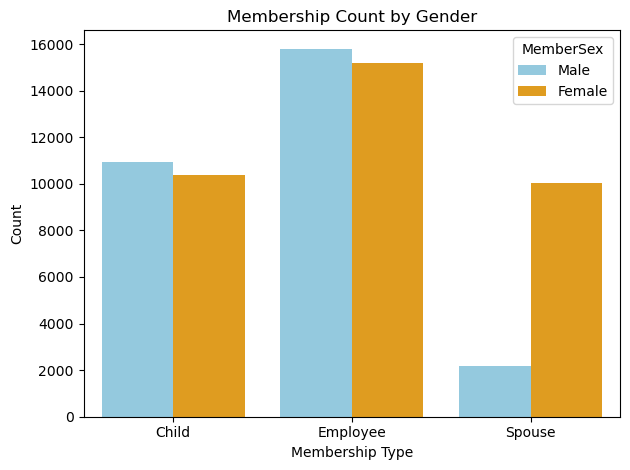

In [60]:
# Plot with specified colors for each gender
sns.countplot(data=member, x="Membership", hue="MemberSex", palette=["skyblue", "orange"])

# Customize the plot
plt.title("Membership Count by Gender")
plt.xlabel("Membership Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Agebin**

In [61]:
# Count values and sort by age bin
age_bin_counts = member['MemberAgeBin'].value_counts().sort_index(ascending=True)

# Calculate percentage
age_bin_percent = (age_bin_counts / age_bin_counts.sum()) * 100

# Combine into a DataFrame
age_bin_summary = pd.DataFrame({
    'Count': age_bin_counts,
    'Percentage': age_bin_percent.round(2)  # Round to 2 decimal places
})

print(age_bin_summary)


              Count  Percentage
MemberAgeBin                   
00-05          7609       11.79
06-10          5631        8.72
11-15          4047        6.27
16-20          3019        4.68
21-25          5083        7.87
26-30         10833       16.78
31-35          9533       14.77
36-40          6582       10.20
41-45          5067        7.85
46-50          3706        5.74
51-55          2573        3.99
56+             871        1.35


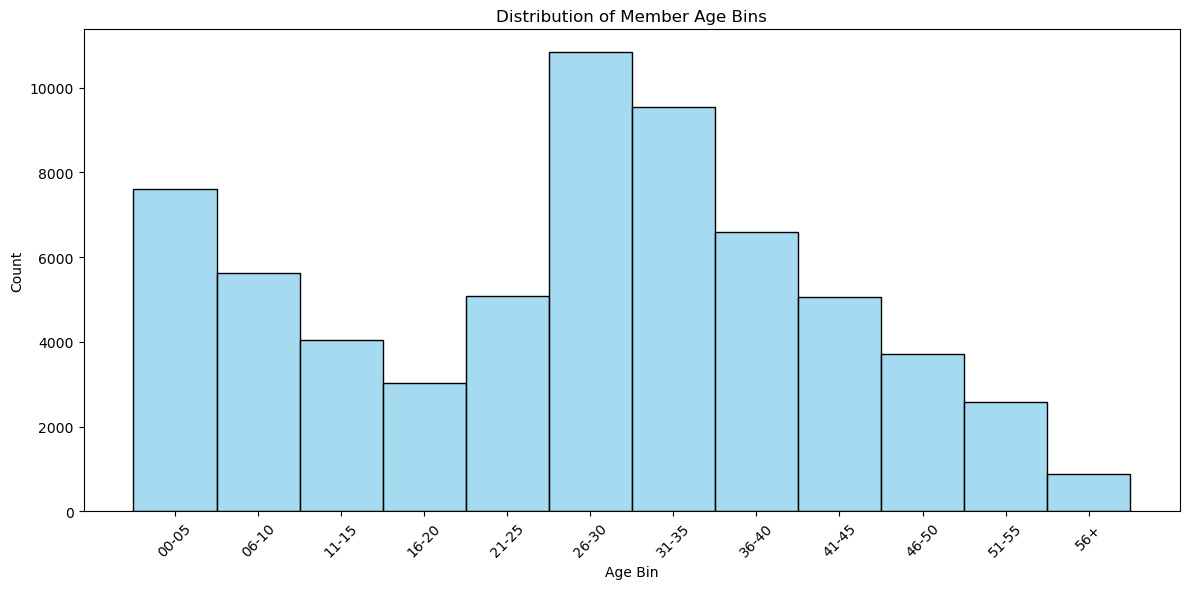

In [62]:
# Create a DataFrame for the counts
age_bin_counts = member['MemberAgeBin'].value_counts().sort_index(ascending=True).reset_index()
age_bin_counts.columns = ['MemberAgeBin', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=age_bin_counts, x='MemberAgeBin', weights='Count', discrete=True, color='skyblue')
plt.title('Distribution of Member Age Bins')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Start Create The Table**

In [63]:
# Assuming 'Gender' is the column name for gender (adjust if different)
age_gender_counts = member.groupby(['MemberAgeBin', 'MemberSex']).agg(total_member=('MemberNo', 'nunique')).reset_index()  # count unique members

# Display the result
age_gender_counts


,MemberAgeBin,MemberSex,total_member
0,00-05,Female,3635
1,00-05,Male,3974
2,06-10,Female,2834
3,06-10,Male,2797
4,11-15,Female,1948
5,11-15,Male,2099
6,16-20,Female,1461
7,16-20,Male,1558
8,21-25,Female,3219
9,21-25,Male,1864


In [64]:
merged_df = pd.merge(claim, member, on='MemberNo', how='left')

In [108]:
claim.isna().sum()

ClaimNo                 0
ClaimMethod             0
BenefitGroupIPOP        0
AdmissionDate           0
DischargeDate       19824
ICDCode                 0
Diagnose                0
ProviderID              1
MemberNo                0
Billed                  0
Accepted                0
YearMonth               0
YearMonth_str           0
Accepted_rate           0
day_stay            19824
dtype: int64

In [117]:
merged_df.isna().sum()

ClaimNo                 0
ClaimMethod             0
BenefitGroupIPOP        0
AdmissionDate           0
DischargeDate       19824
ICDCode                 0
Diagnose                0
ProviderID              1
MemberNo                0
Billed                  0
Accepted                0
YearMonth               0
YearMonth_str           0
Accepted_rate           0
MemberName            374
Membership            374
MemberSex             374
MemberAgeBin          374
CompanyID             374
Company               374
dtype: int64

In [118]:
merged_df[merged_df["MemberName"].isna()]["MemberNo"].unique()

array(['Member3213932', 'Member626584', 'Member468202', 'Member7064028',
       'Member3783610', 'Member9513396', 'Member1870023', 'Member6853670',
       'Member5052087', 'Member5675577', 'Member5915837', 'Member8048940',
       'Member2671852', 'Member5713976', 'Member7939351', 'Member7934703',
       'Member98000', 'Member7585781', 'Member8331050', 'Member2101370',
       'Member2847565', 'Member9577801', 'Member4459757', 'Member9460278',
       'Member6999085', 'Member9779815', 'Member3607500', 'Member4629072',
       'Member4801750', 'Member8000596', 'Member8563297', 'Member2707867',
       'Member4950637', 'Member1047111', 'Member4931066', 'Member2603976',
       'Member6663090', 'Member780983', 'Member3160181', 'Member9621144',
       'Member705896', 'Member7184777', 'Member376432', 'Member5951864',
       'Member1021110', 'Member7790339', 'Member2189752', 'Member2399735',
       'Member1421721', 'Member1875290', 'Member1797114', 'Member5138753',
       'Member4595330', 'Member9

In [66]:
merged_df.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate,MemberName,Membership,MemberSex,MemberAgeBin,CompanyID,Company
0,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12,100.00,Member 34504276,Employee,Female,31-35,C2952082,Company 962885
1,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12,100.00,Member 43641464,Employee,Male,41-45,C8570424,Company 6427569
2,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12,100.00,Member 34424876,Employee,Female,26-30,C2952082,Company 962885
3,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,"236,211.60","236,211.60",2024-12-01,2024-12,100.00,Member 42589337,Spouse,Female,26-30,C1291263,Company 4982169
4,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12,100.00,Member 19655278,Child,Male,06-10,C2952082,Company 962885


In [67]:
# Group by MemberAgeBin and MemberSex, then calculate the required columns
grouped = merged_df.groupby(['MemberAgeBin', 'MemberSex']).agg(
    total_clairmants=('MemberNo', 'nunique'),  # count unique members
    total_claims=('ClaimNo', 'count'),  # count total claims
    total_billed=('Billed', 'sum')  # sum total billed
).reset_index()

grouped

,MemberAgeBin,MemberSex,total_clairmants,total_claims,total_billed
0,00-05,Female,1008,1472,"1,579,525,847.89"
1,00-05,Male,1061,1587,"1,876,169,086.83"
2,06-10,Female,468,646,"573,229,671.00"
3,06-10,Male,447,602,"600,526,518.94"
4,11-15,Female,196,238,"253,221,801.97"
5,11-15,Male,197,243,"288,709,537.17"
6,16-20,Female,118,156,"242,101,785.36"
7,16-20,Male,112,143,"228,823,151.12"
8,21-25,Female,900,1394,"1,186,008,299.78"
9,21-25,Male,384,579,"558,554,885.41"


In [68]:
grouped['total_claims'].sum()

20242

In [69]:

# Perform the merge on MemberAgeBin and MemberSex
combined_df = age_gender_counts.merge(grouped, on=['MemberAgeBin', 'MemberSex'], how='left')

# Display the combined dataframe
combined_df

,MemberAgeBin,MemberSex,total_member,total_clairmants,total_claims,total_billed
0,00-05,Female,3635,1008,1472,"1,579,525,847.89"
1,00-05,Male,3974,1061,1587,"1,876,169,086.83"
2,06-10,Female,2834,468,646,"573,229,671.00"
3,06-10,Male,2797,447,602,"600,526,518.94"
4,11-15,Female,1948,196,238,"253,221,801.97"
5,11-15,Male,2099,197,243,"288,709,537.17"
6,16-20,Female,1461,118,156,"242,101,785.36"
7,16-20,Male,1558,112,143,"228,823,151.12"
8,21-25,Female,3219,900,1394,"1,186,008,299.78"
9,21-25,Male,1864,384,579,"558,554,885.41"


In [70]:
# Calculate the utilization rate
combined_df['utilization_rate'] = (combined_df['total_clairmants'] / combined_df['total_member'])*100

# Reorder the columns to place 'utilization_rate' beside 'total_claims'
columns_order = ['MemberAgeBin', 'MemberSex', 'total_member', 'total_clairmants', 'utilization_rate', 'total_claims', 'total_billed']
combined_df = combined_df[columns_order]

# Display the updated dataframe
combined_df.head()

,MemberAgeBin,MemberSex,total_member,total_clairmants,utilization_rate,total_claims,total_billed
0,00-05,Female,3635,1008,27.73,1472,"1,579,525,847.89"
1,00-05,Male,3974,1061,26.70,1587,"1,876,169,086.83"
2,06-10,Female,2834,468,16.51,646,"573,229,671.00"
3,06-10,Male,2797,447,15.98,602,"600,526,518.94"
4,11-15,Female,1948,196,10.06,238,"253,221,801.97"


In [71]:
# Calculate additional columns: Average billed per claim and Average billed per claimant
combined_df['avg_billed_per_claim'] = combined_df['total_billed'] / combined_df['total_claims']
combined_df['avg_billed_per_claimant'] = combined_df['total_billed'] / combined_df['total_member']

combined_df

C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\4242442434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['avg_billed_per_claim'] = combined_df['total_billed'] / combined_df['total_claims']
C:\Users\Intania\AppData\Local\Temp\ipykernel_3512\4242442434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['avg_billed_per_claimant'] = combined_df['total_billed'] / combined_df['total_member']


,MemberAgeBin,MemberSex,total_member,total_clairmants,utilization_rate,total_claims,total_billed,avg_billed_per_claim,avg_billed_per_claimant
0,00-05,Female,3635,1008,27.73,1472,"1,579,525,847.89","1,073,047.45","434,532.56"
1,00-05,Male,3974,1061,26.70,1587,"1,876,169,086.83","1,182,211.14","472,110.99"
2,06-10,Female,2834,468,16.51,646,"573,229,671.00","887,352.43","202,268.76"
3,06-10,Male,2797,447,15.98,602,"600,526,518.94","997,552.36","214,703.80"
4,11-15,Female,1948,196,10.06,238,"253,221,801.97","1,063,957.15","129,990.66"
5,11-15,Male,2099,197,9.39,243,"288,709,537.17","1,188,105.09","137,546.23"
6,16-20,Female,1461,118,8.08,156,"242,101,785.36","1,551,934.52","165,709.64"
7,16-20,Male,1558,112,7.19,143,"228,823,151.12","1,600,161.90","146,869.80"
8,21-25,Female,3219,900,27.96,1394,"1,186,008,299.78","850,795.05","368,439.98"
9,21-25,Male,1864,384,20.60,579,"558,554,885.41","964,688.92","299,653.91"


In [72]:
combined_df['total_claims'].sum()

20242

In [73]:
# combined_df.to_csv("your_filename.csv", index=False)

In [74]:
claim['MemberNo'].unique().shape

(13677,)

In [75]:
claim[claim['ICDCode']=="I10"]['Billed'].std()

2934468.263022554

<Axes: xlabel='Billed', ylabel='Count'>

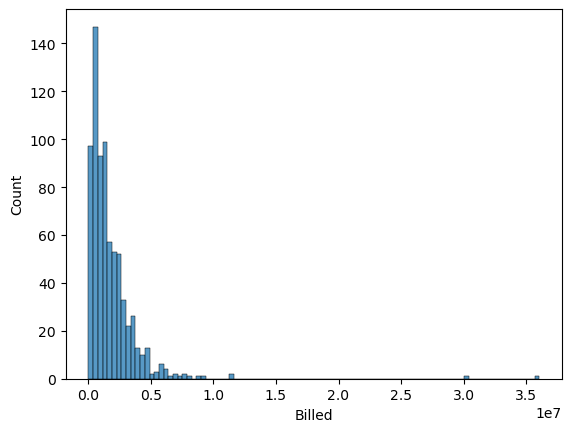

In [76]:
sns.histplot(data = claim[claim['ICDCode']=="H52.1"], x="Billed")

## **Inpatient Analysis**

In [77]:
claim['day_stay'] = claim["DischargeDate"] - claim["AdmissionDate"]
claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate,day_stay
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12,100.00,NaT
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12,100.00,NaT
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12,100.00,NaT
3890,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,"236,211.60","236,211.60",2024-12-01,2024-12,100.00,NaT
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12,100.00,NaT


In [78]:
inpatient = claim[claim["BenefitGroupIPOP"] == "INPATIENT"]
inpatient.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate,day_stay
3874,186706010,Cashless,INPATIENT,2024-12-31,2025-01-03,R50.9,"Fever,Unspecified (Demam, Tidak Specifik)",P247,Member6866937,"4,224,271.99","3,801,845.22",2024-12-01,2024-12,90.00,3 days
17587,853227805,Reimbursement,INPATIENT,2024-12-29,2024-12-29,A09,Diarrhoea And Gastroenteritis Of Presumed Infe...,P924044,Member2220454,"206,243.33",0.00,2024-12-01,2024-12,0.00,0 days
3901,188372368,Cashless,INPATIENT,2024-12-08,2024-12-08,J06,Acute Upper Respiratory Infections Of Multiple...,P924044,Member4743722,"1,169,514.75","1,169,514.75",2024-12-01,2024-12,100.00,0 days
3827,184725613,Cashless,INPATIENT,2024-12-15,2024-12-15,R50.9,"Fever,Unspecified (Demam, Tidak Specifik)",P924044,Member6782226,"388,258.92","388,258.92",2024-12-01,2024-12,100.00,0 days
3853,186176332,Cashless,INPATIENT,2024-12-31,2025-01-02,O82,Single Delivery By Caesarean Section (Melahirk...,P455690,Member1980024,"24,343,852.60","24,343,852.60",2024-12-01,2024-12,100.00,2 days


In [86]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 3874 to 17412
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   ClaimNo           792 non-null    int64          
 1   ClaimMethod       792 non-null    object         
 2   BenefitGroupIPOP  792 non-null    object         
 3   AdmissionDate     792 non-null    datetime64[ns] 
 4   DischargeDate     792 non-null    datetime64[ns] 
 5   ICDCode           792 non-null    object         
 6   Diagnose          792 non-null    object         
 7   ProviderID        792 non-null    object         
 8   MemberNo          792 non-null    object         
 9   Billed            792 non-null    float64        
 10  Accepted          792 non-null    float64        
 11  YearMonth         792 non-null    datetime64[ns] 
 12  YearMonth_str     792 non-null    object         
 13  Accepted_rate     792 non-null    float64        
 14  day_stay  

In [90]:
inpatient['day_stay'] = inpatient['day_stay'].dt.days


AttributeError: Can only use .dt accessor with datetimelike values

In [96]:
inpatient[['day_stay', 'Billed']].corr(method='spearman')


,day_stay,Billed
day_stay,1.00,0.70
Billed,0.70,1.00


In [93]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 3874 to 17412
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ClaimNo           792 non-null    int64         
 1   ClaimMethod       792 non-null    object        
 2   BenefitGroupIPOP  792 non-null    object        
 3   AdmissionDate     792 non-null    datetime64[ns]
 4   DischargeDate     792 non-null    datetime64[ns]
 5   ICDCode           792 non-null    object        
 6   Diagnose          792 non-null    object        
 7   ProviderID        792 non-null    object        
 8   MemberNo          792 non-null    object        
 9   Billed            792 non-null    float64       
 10  Accepted          792 non-null    float64       
 11  YearMonth         792 non-null    datetime64[ns]
 12  YearMonth_str     792 non-null    object        
 13  Accepted_rate     792 non-null    float64       
 14  day_stay          792 non-

In [98]:
inpatient.groupby('day_stay')['Billed'].agg(['count', 'mean', 'median', 'max']).reset_index()


,day_stay,count,mean,median,max
0,0,282,"2,504,131.67","717,117.12","75,074,955.59"
1,1,39,"6,520,268.88","5,393,951.36","32,537,387.97"
2,2,154,"11,184,211.48","7,763,842.74","80,950,238.24"
3,3,150,"16,703,675.59","12,329,249.13","78,067,164.62"
4,4,100,"18,135,669.39","12,896,705.57","98,398,888.83"
5,5,36,"15,818,761.20","13,067,606.28","39,644,927.90"
6,6,19,"14,417,574.97","15,402,210.02","34,010,812.03"
7,7,7,"38,294,789.58","26,463,806.50","135,841,657.38"
8,8,2,"48,384,013.55","48,384,013.55","50,366,369.76"
9,9,3,"31,109,473.56","19,249,756.74","70,432,583.94"


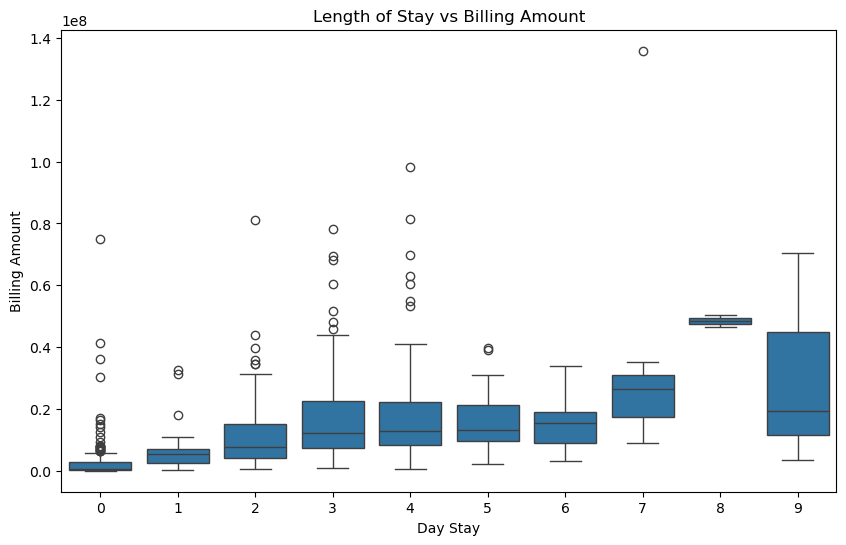

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_stay', y='Billed', data=inpatient)
plt.xlabel('Day Stay')
plt.ylabel('Billing Amount')
plt.title('Length of Stay vs Billing Amount')
plt.show()

<Figure size 1000x600 with 0 Axes>

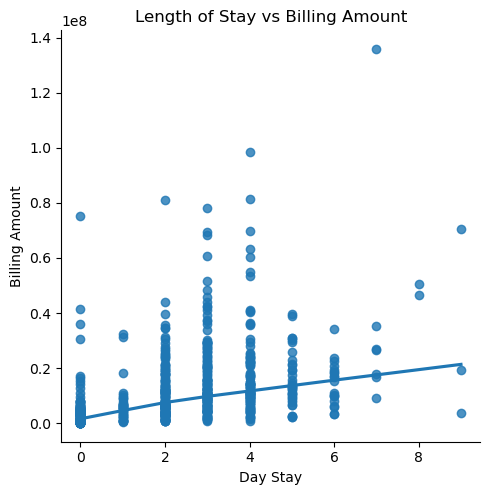

In [105]:
plt.figure(figsize=(10,6))
sns.lmplot(x='day_stay', y='Billed', data=inpatient, lowess=True)
plt.xlabel('Day Stay')
plt.ylabel('Billing Amount')
plt.title('Length of Stay vs Billing Amount')
plt.show()

## **Combination of claim and provider**

**Is there any province that show growth trend from time to time?"**

In [81]:
claim.head()

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate,day_stay
12896,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12,100.00,NaT
3892,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12,100.00,NaT
3891,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12,100.00,NaT
3890,187469036,Cashless,OUTPATIENT,2024-12-28,NaT,Z34,Supervision Of Normal Pregnancy,P74671,Member4122950,"236,211.60","236,211.60",2024-12-01,2024-12,100.00,NaT
17597,853736726,Cashless,OUTPATIENT,2024-12-28,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P671080,Member7844788,"178,464.49","178,464.49",2024-12-01,2024-12,100.00,NaT


In [82]:
df_merge = claim.merge(
    provider,
    how='left',      # left join
    on='ProviderID'  # join key
)
df_merge.head(3)

,ClaimNo,ClaimMethod,BenefitGroupIPOP,AdmissionDate,DischargeDate,ICDCode,Diagnose,ProviderID,MemberNo,Billed,Accepted,YearMonth,YearMonth_str,Accepted_rate,day_stay,ProviderName,ProviderType,Province,City
0,630332007,Cashless,OUTPATIENT,2024-12-17,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P67440,Member7113377,"369,513.83","369,513.83",2024-12-01,2024-12,100.00,NaT,Provider 67440,Hospital,Jawa Barat,Kota Depok
1,187635855,Cashless,OUTPATIENT,2024-12-08,NaT,J06.9,"Acute Upper Respiratory Infection, Unspecified",P501624,Member8642505,"232,135.49","232,135.49",2024-12-01,2024-12,100.00,NaT,Provider 501624,Clinic,D.K.I. Jakarta,Kota Jakarta Pusat
2,187545330,Cashless,OUTPATIENT,2024-12-22,NaT,J06,Acute Upper Respiratory Infections Of Multiple...,P453895,Member2439120,"1,326,671.92","1,326,671.92",2024-12-01,2024-12,100.00,NaT,Provider 453895,Hospital,Jawa Barat,Kab. Purwakarta


In [83]:
# 1. Aggregate monthly transaction counts per Province
monthly_counts = (
    df_merge
    .groupby(['YearMonth', 'Province'])
    .size()
    .reset_index(name='transaction_count')
)

# 2. Sort by Province and date so pct_change works correctly
monthly_counts = monthly_counts.sort_values(['Province', 'YearMonth'])

# 3. Compute month-over-month growth (as a fraction) and/or absolute change
monthly_counts['pct_growth'] = (
    monthly_counts
    .groupby('Province')['transaction_count']
    .pct_change()  # fraction change: (this_month – last_month) / last_month
    .fillna(0)
)
monthly_counts['abs_growth'] = (
    monthly_counts
    .groupby('Province')['transaction_count']
    .diff()  # this_month – last_month
    .fillna(0)
)

# 4. (Optional) Format pct_growth as a percentage
monthly_counts['pct_growth'] = (monthly_counts['pct_growth'] * 100).round(2)

monthly_counts


,YearMonth,Province,transaction_count,pct_growth,abs_growth
0,2024-12-01,Bali,187,0.00,0.00
26,2025-01-01,Bali,207,10.70,20.00
50,2025-02-01,Bali,173,-16.43,-34.00
76,2025-03-01,Bali,171,-1.16,-2.00
101,2025-04-01,Bali,73,-57.31,-98.00
...,...,...,...,...,...
25,2024-12-01,Sumatera Utara,57,0.00,0.00
49,2025-01-01,Sumatera Utara,58,1.75,1.00
75,2025-02-01,Sumatera Utara,59,1.72,1.00
100,2025-03-01,Sumatera Utara,56,-5.08,-3.00


In [84]:
monthly_counts.describe()

,YearMonth,transaction_count,pct_growth,abs_growth
count,124,124.00,124.00,124.00
mean,2025-01-29 14:07:44.516129024,166.25,-6.65,-23.29
min,2024-12-01 00:00:00,1.00,-80.56,"-1,180.00"
25%,2025-01-01 00:00:00,15.00,-26.11,-12.00
50%,2025-02-01 00:00:00,41.00,0.00,0.00
75%,2025-03-01 00:00:00,88.75,2.12,1.00
max,2025-04-01 00:00:00,"1,761.00",300.00,164.00
std,NaN,362.51,45.87,131.67


In [85]:
# Method 2: idxmax (returns the integer position of the first max)
idx = monthly_counts['pct_growth'].idxmax()
row_max = monthly_counts.loc[idx]
print(row_max)

YearMonth            2025-03-01 00:00:00
Province                  Sumatera Barat
transaction_count                      4
pct_growth                        300.00
abs_growth                          3.00
Name: 98, dtype: object
